# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2022)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.04.2022

## Entwicklung einer Funktion in ein Lagrange Polynom

Zunächst wird das Python Modul "sympy" eingebunden, das ein Computer-Algebra-System für Python bereitstellt und eine Vielzahl an symbolischen Berechnungen im Bereich der Mathematik und Physik relativ einfach möglich macht. Falls Sie das "sympy" Modul das erste Mal verwenden, müssen Sie es zunächst in Ihrer Python 3 Umgebung installieren (z.B. in einem Linux Terminal mit "pip3 install sympy").

In [1]:
from sympy import *
init_printing()

Wir möchten nun die Funktion $f(x)=\frac{1}{x}$ mittels ($n+1$) vorgegebener Punkte ($(x_0,f(x_0)), (x_1,f(x_1)),  ..., (x_n,f(x_n)), $) in ein Lagrange Polynom vom Grade N entwickeln. Hierzu definieren wir zunächst die Funktion:

In [2]:
x = Symbol('x')
f = 1/x

Das n-te Lagrange Polynom $P_n(x)$ einer Funktion ist wie folgt definiert:

$$
\begin{equation}
P_n(x) = \sum_{k=0}^n f(x_k) \cdot L_{n,k}(x) \quad,
\end{equation}
$$

mit 

$$
\begin{equation}
L_{n,k}(x) = \prod_{i=0 , \, i \neq k}^n \frac{(x-x_i)}{(x_k-x_i)} \quad.
\end{equation}
$$

Approximiert man die Funktion $f(x)=\frac{1}{x}$ z.B. mittels drei vorgegebener Punkte ($(2,f(2)), (2.5,f(2.5))$ und $(4,f(4)) $) in ein Lagrange Polynom vom Grade 2, so erhält man:

In [3]:
n=2
points=[2, 2.5, 4]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2])]

In [4]:
List_ranges=[]
for i in range(n+1):
    List_range=list(range(n+1))
    List_range.pop(i)
    List_ranges.append(List_range)
List_ranges
P_2=sum(f_points[k] * prod((x - points[i])/(points[k] - points[i])  for i in List_ranges[k]) for k in range(n+1))
P_2.simplify()

Wir stellen uns im Folgenden die ersten drei Taylorpolynome $P_1(x), P_2(x)$ und $P_3(x)$ der Funktion $f(x)=\frac{1}{x}$ mit $x_0=1$ grafisch dar und vergleichen diese mit der ursprünglichen Funktion $f(x)$.

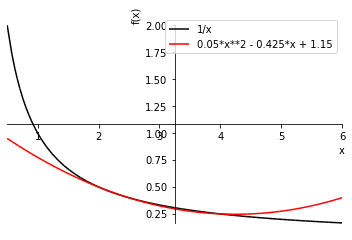

In [6]:
x_min=0.5
x_max=6
pf = plot(f, P_2.simplify(), (x,x_min,x_max), line_color='black', legend = True, show=False)
pf[1].line_color='red'
pf.show()

Wir vergleichen die zuvor dargestellten Berechnungen mit den simulierten Daten des C++ Programms ( Lagrange_Polynom_1.cpp ):

In [7]:
import matplotlib.pyplot as plt   
import numpy as np
points = np.genfromtxt("./Lagrange_Polynom_1.dat", max_rows=1)  
data = np.genfromtxt("./Lagrange_Polynom_1.dat", skip_header=7) 

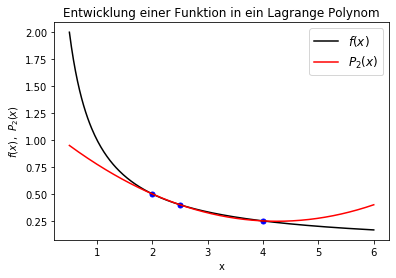

In [8]:
plt.title(r'Entwicklung einer Funktion in ein Lagrange Polynom')
plt.ylabel(r'$f(x)\, , \,\, P_2(x)$')
plt.xlabel('x')
plt.plot(data[:,1],data[:,2], color="black", label=r'$f(x)$')
plt.plot(data[:,1],data[:,3], color="red", label=r'$P_2(x)$')
plt.scatter(points,1/points, marker='o', color="blue", s=25);
plt.legend(frameon=True, loc="upper right",fontsize=12);

Man sieht, dass die berechneten Ergebnisse identisch sind.

Wir stellen uns nun das 6-te Taylorpolynom $P_{6}(x)$ der Funktion $f(x)=\frac{1}{x}$ mit $x_0=1$ grafisch dar und vergleichen es wieder mit der ursprünglichen Funktion $f(x)$.

In [9]:
n=6
points=[1, 1.5, 2, 2.5, 3, 5, 7]
f_points=[]
for i in range(n+1):
    f_points.append(f.subs(x,points[i]))

In [10]:
List_ranges=[]
for i in range(n+1):
    List_range=list(range(n+1))
    List_range.pop(i)
    List_ranges.append(List_range)
List_ranges
P_6=sum(f_points[k] * prod((x - points[i])/(points[k] - points[i])  for i in List_ranges[k]) for k in range(n+1))
P_6.simplify()

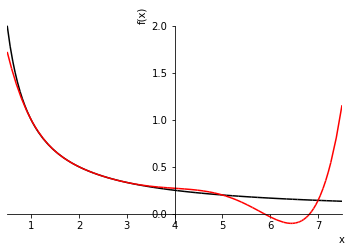

In [11]:
x_min=0.5
x_max=7.5
pf = plot(f, P_6.simplify(), (x,x_min,x_max), line_color='black', show=False)
pf[1].line_color='red'
pf.show()

Wir vergleichen die zuvor dargestellten Berechnungen mit den simulierten Daten des C++ Programms ( Lagrange_Polynom_2.cpp ):

In [12]:
points = np.genfromtxt("./Lagrange_Polynom_2.dat", max_rows=1)  
data = np.genfromtxt("./Lagrange_Polynom_2.dat", skip_header=7)

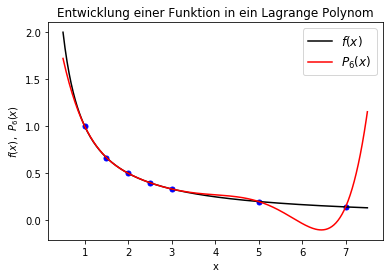

In [13]:
plt.title(r'Entwicklung einer Funktion in ein Lagrange Polynom')
plt.ylabel(r'$f(x)\, , \,\, P_6(x)$')
plt.xlabel('x')
plt.plot(data[:,1],data[:,2], color="black", label=r'$f(x)$')
plt.plot(data[:,1],data[:,3], color="red", label=r'$P_6(x)$')
plt.scatter(points,1/points, marker='o', color="blue", s=25);
plt.legend(frameon=True, loc="upper right",fontsize=12);

Man sieht wieder, dass die berechneten Ergebnisse identisch sind.